In [539]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import statsmodels.api as sm

In [540]:
def is_stationary(data):
    import matplotlib.pyplot as plt
    
    data.dropna(inplace=True)
    rolmean=data.rolling(window=12).mean()
    rolstd = data.rolling(window=12).std()

    orig = plt.plot(data,label='original')
    mean= plt.plot(rolmean,label='Rolling mean')
    std = plt.plot(rolstd,label='Rolling std')
    
    plt.legend(loc='best')
    plt.title('Timeseries data with Rolling Mean and STD')
    
    from statsmodels.tsa.stattools import adfuller
    
    dftest = adfuller(data,autolag='AIC',regression='ct')
    dfoutput = pd.Series(dftest[0:4],index=['The test statistics','p-value','usedLags','Nobs'])
    print(dfoutput)

In [541]:
weather_energy = pd.read_csv('final.csv',)
weather_energy['day'] = pd.to_datetime(weather_energy.day,infer_datetime_format=True)
weather_energy.set_index('day',inplace=True)
weather_energy.shape

(827, 15)

In [542]:
weather_energy.head()

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1


In [543]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(weather_energy['avg_energy'],model ="additive")

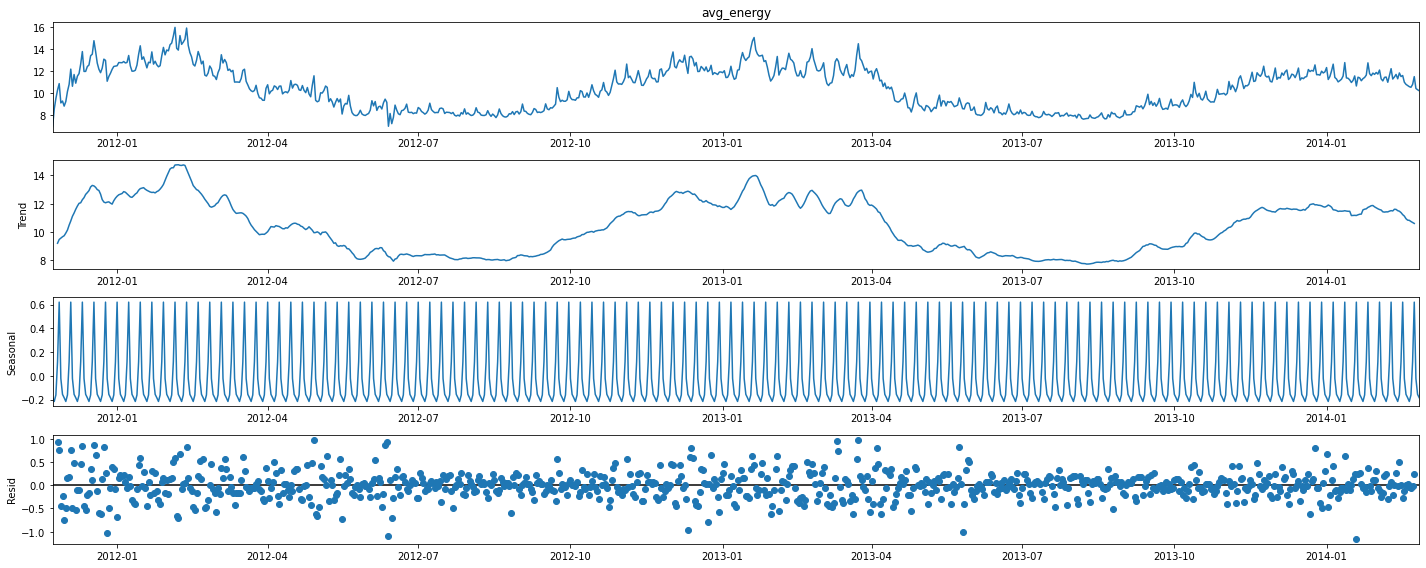

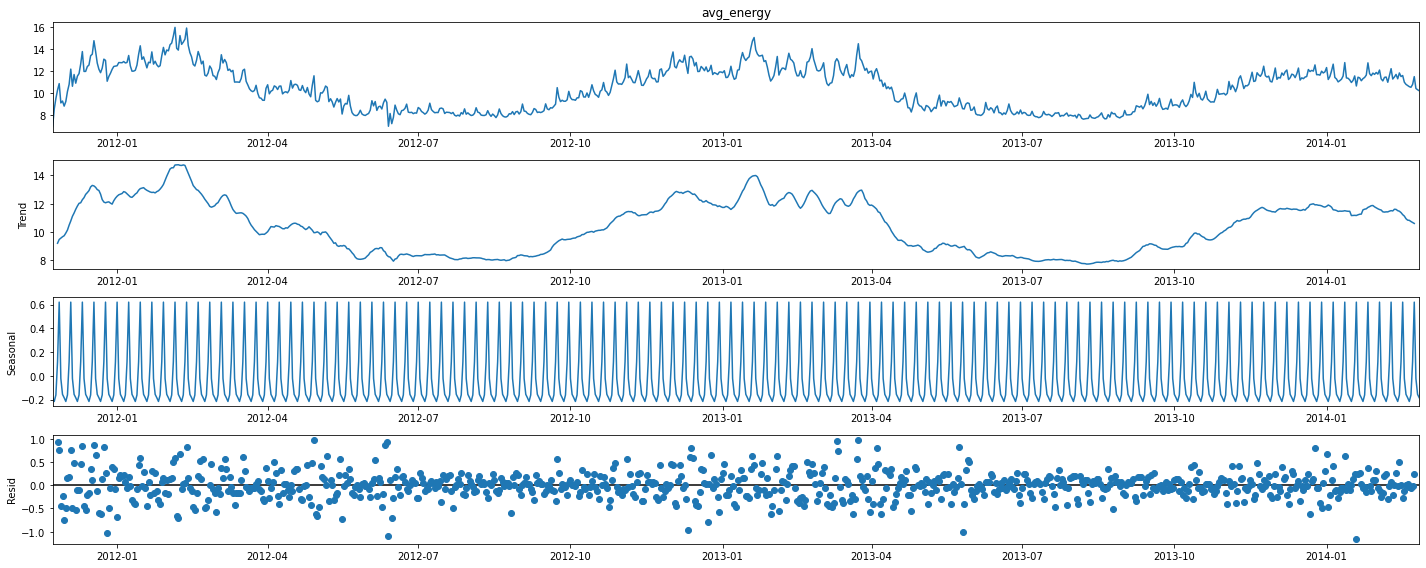

In [544]:
plt.rcParams["figure.figsize"] = (20,8)
decompose_data.plot()


In [545]:
t = sm.tsa.adfuller(weather_energy["avg_energy"], autolag='AIC',regression='ct')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.980936
p-value                          0.611779
#Lags Used                      21.000000
Number of Observations Used    805.000000
dtype: float64

In [546]:
weather_energy

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-22,10.776242,10.0,3.0,0.0,10.3,3.0,48.0,32.0,27.0,84.0,0.0,1009,10.0,223,1
2014-02-23,11.480411,12.0,6.0,0.0,6.9,2.0,42.0,44.0,66.0,91.0,0.3,1011,9.0,186,1
2014-02-24,10.411403,13.0,6.0,0.0,8.5,2.0,35.0,35.0,44.0,85.0,0.1,1006,10.0,175,0


Text(0.5, 1.0, 'ts_log_diff graph')

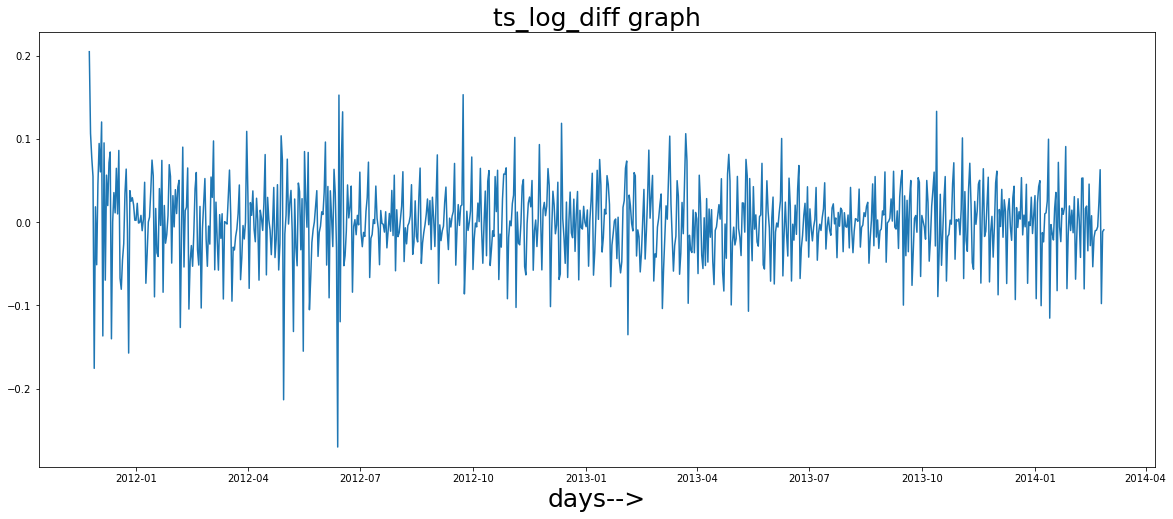

In [547]:
import numpy as np
weather_energy.avg_energy = np.log(weather_energy.avg_energy )
weather_energy['ts_log_diff'] = weather_energy.avg_energy - weather_energy.avg_energy.shift()
plt.plot(weather_energy.ts_log_diff)
plt.xlabel("days-->", fontsize=25)
plt.title("ts_log_diff graph", fontsize=25)

In [548]:
weather_energy

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday,ts_log_diff
day,,,,,,,,,,,,,,,,
2011-11-23,1.939129,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0,NaN
2011-11-24,2.144349,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0,0.205220
2011-11-25,2.251269,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0,0.106920
2011-11-26,2.329004,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1,0.077735
2011-11-27,2.384239,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1,0.055236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-22,2.377344,10.0,3.0,0.0,10.3,3.0,48.0,32.0,27.0,84.0,0.0,1009,10.0,223,1,0.024244
2014-02-23,2.440642,12.0,6.0,0.0,6.9,2.0,42.0,44.0,66.0,91.0,0.3,1011,9.0,186,1,0.063298
2014-02-24,2.342902,13.0,6.0,0.0,8.5,2.0,35.0,35.0,44.0,85.0,0.1,1006,10.0,175,0,-0.097741


The test statistics   -6.670795e+00
p-value                7.738891e-08
usedLags               2.000000e+01
Nobs                   8.050000e+02
dtype: float64


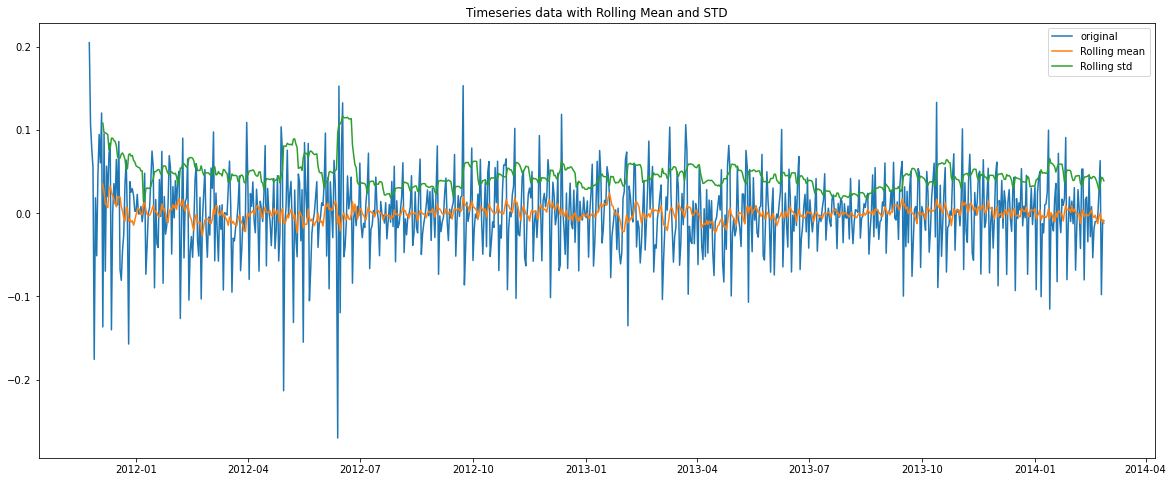

In [549]:
is_stationary(weather_energy.ts_log_diff)

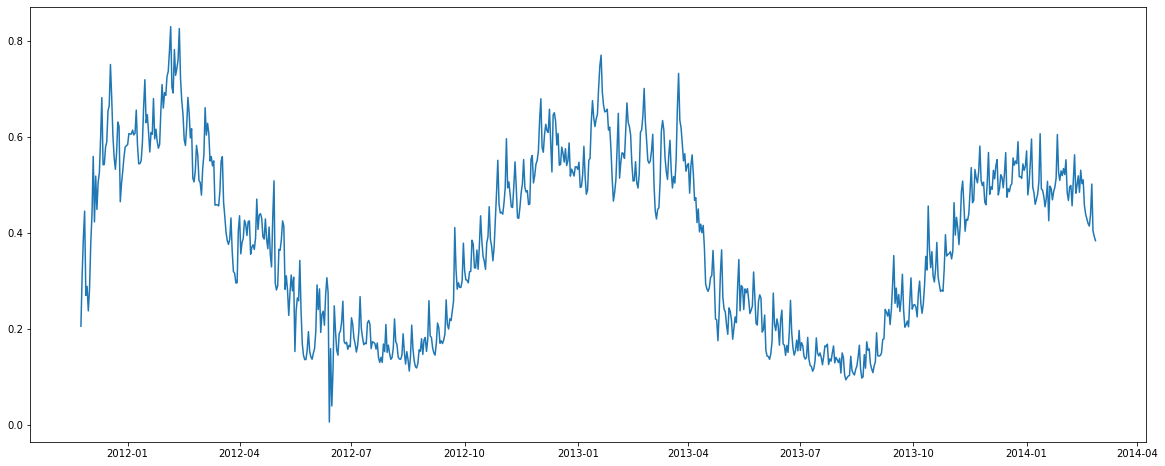

In [550]:
plt.plot(np.cumsum(weather_energy.ts_log_diff))

In [551]:
avg_energy = weather_energy['avg_energy'].copy()
weather_energy.drop('avg_energy',axis=1,inplace=True)

In [552]:
avg_energy

day
2011-11-23    1.939129
2011-11-24    2.144349
2011-11-25    2.251269
2011-11-26    2.329004
2011-11-27    2.384239
                ...   
2014-02-22    2.377344
2014-02-23    2.440642
2014-02-24    2.342902
2014-02-25    2.331658
2014-02-26    2.322676
Name: avg_energy, Length: 827, dtype: float64

In [553]:
weather_energy.dropna(inplace=True)

In [554]:
weather_energy.shape

(826, 15)

In [555]:
n_train_time = 454;
original_n_train_time=n_train_time;
pred_list=[]; 
testing_rows=372;


train_data = weather_energy[:n_train_time]
test_data = weather_energy[n_train_time:n_train_time+testing_rows]

In [556]:
train_data

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday,ts_log_diff
day,,,,,,,,,,,,,,,
2011-11-24,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0,0.205220
2011-11-25,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0,0.106920
2011-11-26,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1,0.077735
2011-11-27,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1,0.055236
2011-11-28,10.0,5.0,0.0,8.2,3.0,18.0,20.0,36.0,87.0,0.1,1023,10.0,197,0,-0.175593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-15,9.0,1.0,0.0,10.0,2.0,32.0,20.0,34.0,87.0,0.1,1019,10.0,295,0,-0.036430
2013-02-16,9.0,4.0,0.0,6.7,2.0,39.0,11.0,68.0,80.0,0.0,1023,10.0,207,1,0.000908
2013-02-17,8.0,2.0,0.0,10.1,2.0,46.0,20.0,23.0,87.0,0.0,1022,9.0,126,1,0.039592


In [557]:
X_train=train_data.drop("ts_log_diff", axis=1)
y_train=train_data["ts_log_diff"]
X_test=test_data.drop("ts_log_diff", axis=1)
y_test=test_data["ts_log_diff"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454, 14), (372, 14), (454,), (372,))

In [558]:
from pmdarima.arima import auto_arima
model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1, max_p=7, max_q=7, m=7,
                    seasonal=True,trace=True, error_action='ignore', suppress_warnings=True,
                    stepwise=True)

# from pmdarima.arima import auto_arima
# model = auto_arima(y_train, exogenous=X_train,suppress_warnings=True)

# from pmdarima.arima import auto_arima
# model = auto_arima(y_train, exogenous=X_train,suppress_warnings=True,max_order=None,max_p=7, max_q=7,max_d=2,
#                   max_P=4,max_Q=4,max_D=2)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=-1552.123, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-1489.163, Time=0.30 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-1540.447, Time=0.57 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-1522.547, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=833.335, Time=1.93 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=-1520.408, Time=0.64 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=-1540.095, Time=0.61 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=-1565.510, Time=0.94 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=-1560.497, Time=0.91 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=-1573.030, Time=1.94 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept   : AIC=-1555.878, Time=0.96 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=-1575.112, Time=1.82 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=-1557.940, Time=1.00 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=-1567.583, Time=0.99 sec
 ARIMA(0,0,1)(1,0,1)[

In [559]:
model.aic()

-1577.1373212347899

In [560]:
model_order = model.order
model_seasonal_order = model.seasonal_order
print(model_order)
print(model_seasonal_order)

(0, 0, 1)
(2, 0, 2, 7)


In [561]:
model_sarimax = sm.tsa.statespace.SARIMAX(endog = y_train,order=model_order,
                                          seasonal_order=model_seasonal_order, 
                                          exog = X_train,enforce_stationarity=False, 
                                          enforce_invertibility=False)

C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [562]:
model_fit = model_sarimax.fit()


C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [563]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            ts_log_diff   No. Observations:                  454
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood                 808.907
Date:                                Fri, 19 Aug 2022   AIC                          -1577.813
Time:                                        11:47:16   BIC                          -1496.169
Sample:                                    11-24-2011   HQIC                         -1545.598
                                         - 02-19-2013                                         
Covariance Type:                                  opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
maxtempC             -0.0009      0.002     -0.606      0.545      -0.004       0.002
mintempC              0.0017      0.002      1.068      0.285      -0.001       0.005
totalSnow_cm         -0.0005      0.005     -0.106      0.916      -0.011       0.010
sunHour              -0.0011      0.001     -1.180      0.238      -0.003       0.001
uvIndex              -0.0064      0.007     -0.899      0.369      -0.020       0.008
moon_illumination -6.252e-05   6.89e-05     -0.908      0.364      -0.000    7.25e-05
WindGustKmph         -0.0001      0.000     -0.313      0.754      -0.001       0.001
cloudcover        -3.167e-07      0.000     -0.002      0.998      -0.000       0.000
humidity             -0.0008      0.001     -1.354      0.176      -0.002       0.000
precipMM              0.0026      0.001      2.008      0.045    6.33e-05       0.005
pressure           9.756e-05    5.9e-05      1.653      0.098   -1.81e-05       0.000
visibility           -0.0002      0.002     -0.118      0.906      -0.004       0.004
winddirDegree     -6.684e-05   3.22e-05     -2.079      0.038      -0.000   -3.82e-06
IsBankHoliday         0.0513      0.009      5.767      0.000       0.034       0.069
ma.L1                -0.2248      0.056     -4.011      0.000      -0.335      -0.115
ar.S.L7               0.4037      0.351      1.151      0.250      -0.284       1.091
ar.S.L14              0.3742      0.300      1.245      0.213      -0.215       0.963
ma.S.L7              -0.2908      0.364     -0.798      0.425      -1.005       0.424
ma.S.L14             -0.2862      0.276     -1.038      0.299      -0.827       0.254
sigma2                0.0018      0.000     16.155      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               541.06
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.01
Prob(H) (two-sided):                  0.22   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [564]:
print(max(X_test.index))
print(min(X_test.index))

2014-02-26 00:00:00
2013-02-20 00:00:00


In [565]:
print(max(X_train.index))
print(min(X_train.index))

2013-02-19 00:00:00
2011-11-24 00:00:00


In [566]:
y_train_pred_sarimax = model_fit.predict(start='2011-11-24', end='2013-02-19',exog = X_train)
y_train_pred_sarimax

2011-11-24   -0.023576
2011-11-25   -0.015435
2011-11-26    0.025531
2011-11-27    0.029162
2011-11-28   -0.020287
                ...   
2013-02-15   -0.008911
2013-02-16    0.048906
2013-02-17    0.046502
2013-02-18   -0.036514
2013-02-19   -0.024607
Freq: D, Name: predicted_mean, Length: 454, dtype: float64

In [567]:
y_test_pred_sarimax = model_fit.predict(start=min(X_test.index.date), end=max(X_test.index.date),exog = X_test)
y_test_pred_sarimax.head()

2013-02-20   -0.008108
2013-02-21   -0.001056
2013-02-22    0.013169
2013-02-23    0.050465
2013-02-24    0.043042
Freq: D, Name: predicted_mean, dtype: float64

In [568]:
from sklearn.metrics import mean_absolute_error
trainScore = mean_absolute_error(y_train, y_train_pred_sarimax)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_sarimax)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.03 MAE
Test Score: 0.03 MAE


<AxesSubplot:xlabel='day'>

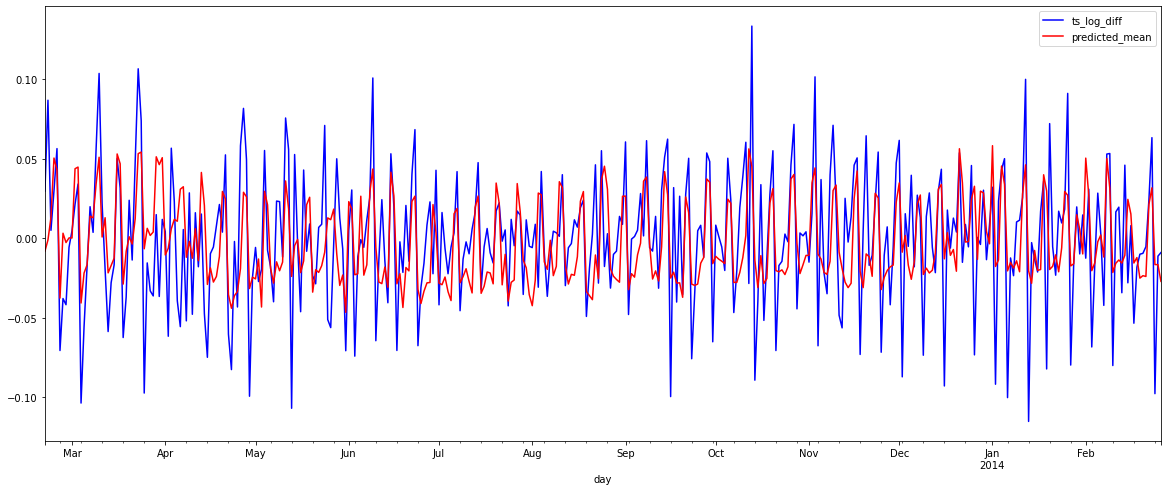

In [569]:
y_test.plot(figsize=(20,8), legend=True, color='blue')
y_test_pred_sarimax.plot(legend=True, color='red', figsize=(20,8))

In [570]:
y_test_pred_sarimax_df = pd.DataFrame(y_test_pred_sarimax)
y_test_pred_sarimax_df

,predicted_mean
2013-02-20,-0.008108
2013-02-21,-0.001056
2013-02-22,0.013169
2013-02-23,0.050465
2013-02-24,0.043042
...,...
2014-02-22,0.021340
2014-02-23,0.031728
2014-02-24,-0.016534
2014-02-25,-0.016591


<AxesSubplot:>

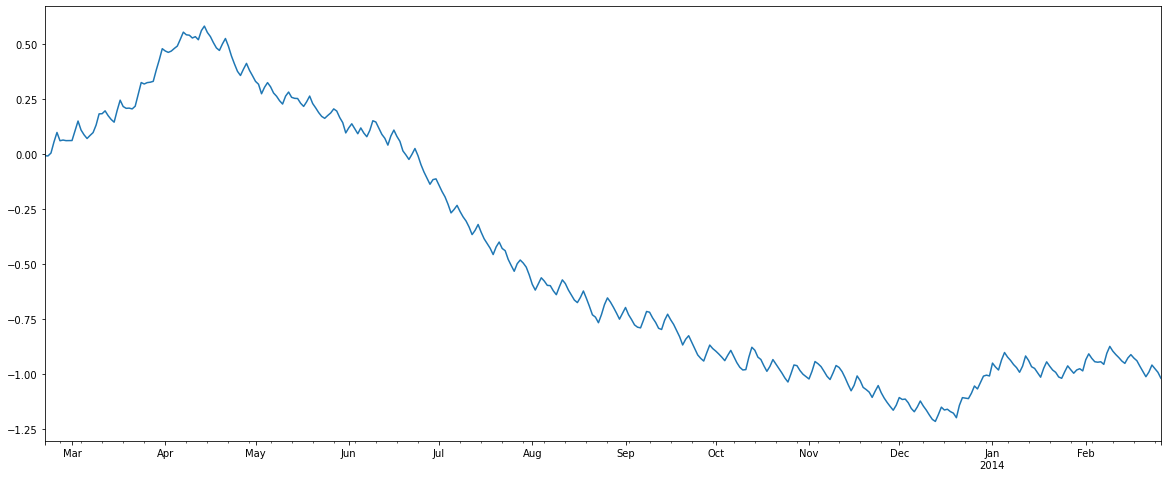

In [571]:
np.cumsum(y_test_pred_sarimax_df.predicted_mean).plot()

In [572]:
y_test_pred_sarimax_df.predicted_mean.cumsum()

2013-02-20   -0.008108
2013-02-21   -0.009164
2013-02-22    0.004005
2013-02-23    0.054470
2013-02-24    0.097512
                ...   
2014-02-22   -0.990277
2014-02-23   -0.958549
2014-02-24   -0.975083
2014-02-25   -0.991674
2014-02-26   -1.018778
Freq: D, Name: predicted_mean, Length: 372, dtype: float64

In [573]:
ts_log = avg_energy['2013-02-20':'2014-02-26']

In [574]:
ts_log

day
2013-02-20    2.461970
2013-02-21    2.548819
2013-02-22    2.553829
2013-02-23    2.583663
2013-02-24    2.640077
                ...   
2014-02-22    2.377344
2014-02-23    2.440642
2014-02-24    2.342902
2014-02-25    2.331658
2014-02-26    2.322676
Name: avg_energy, Length: 372, dtype: float64

In [575]:
import numpy as np
from sklearn.metrics import mean_absolute_error


##Calculate error of the SARIMA model
ts_log = avg_energy['2013-02-20':'2014-02-26']
y_true = ts_log.values
y_pred = y_test_pred_sarimax_df.predicted_mean.cumsum().values
print("RMSE :",mean_squared_error(np.exp(y_true), np.exp(y_pred)))
print("MSE :",mean_squared_error(np.exp(y_true), np.exp(y_pred), squared=False))
print("MAE :",mean_absolute_error(np.exp(y_true), np.exp(y_pred)))
print("MAPE",mean_absolute_percentage_error(np.exp(y_true), np.exp(y_pred)))





RMSE : 88.41603036988458
MSE : 9.402979866504266
MAE : 9.246238192991001
MAPE 0.9240718135658523


In [576]:
weather_energy = pd.read_csv('final.csv',)
weather_energy['day'] = pd.to_datetime(weather_energy.day,infer_datetime_format=True)
weather_energy.set_index('day',inplace=True)

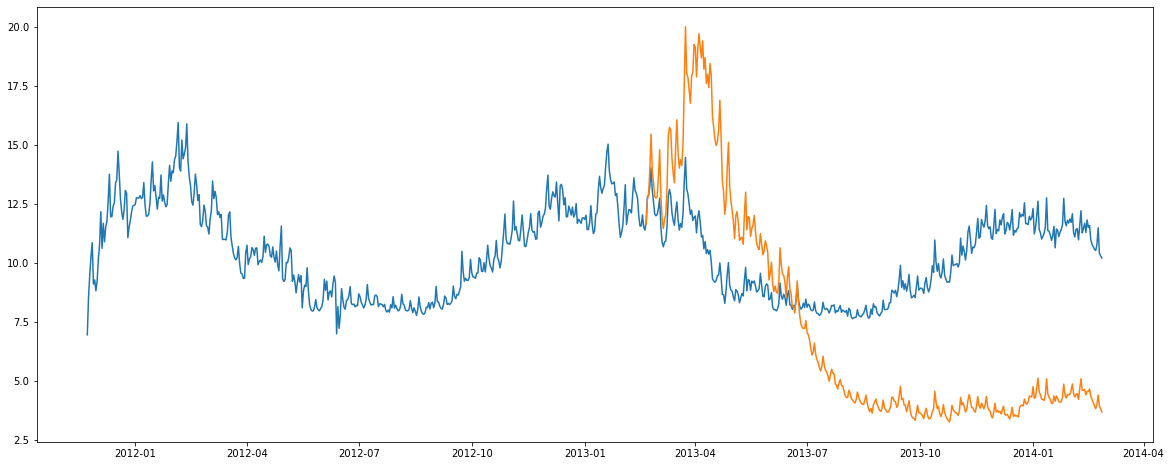

In [577]:
predictions_ARIMA_diff_cumsum = y_test_pred_sarimax_df.predicted_mean.cumsum()
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(weather_energy.avg_energy)
plt.plot(predictions_ARIMA)


In [578]:
predictions_ARIMA

day
2013-02-20    11.633186
2013-02-21    12.675299
2013-02-22    12.907826
2013-02-23    13.987072
2013-02-24    15.449694
                ...    
2014-02-22     4.003091
2014-02-23     4.402151
2014-02-24     3.926776
2014-02-25     3.818983
2014-02-26     3.683628
Length: 372, dtype: float64

In [579]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

print("RMSE: ",mean_squared_error(y_true, pred_list))
print("MSE: ",mean_squared_error(y_true, pred_list, squared=False))
print("MAE: ",mean_absolute_error(y_true, pred_list))
print("MAPE: ",mean_absolute_percentage_error(y_true, pred_list))

ValueError: Found input variables with inconsistent numbers of samples: [372, 0]